In [1]:
#读取数据
%matplotlib notebook

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np                           
import pandas as pd                       #能快速读取常规大小的文件。Pandas能提供高性能、易用的数据结构和数据分析工具
from sklearn.utils import shuffle             #随机打乱工具，将原有序列打乱，返回一个全新的顺序错乱的值

In [3]:
#读取数据文件
df = pd.read_csv("solo_train_processed.csv",header=0)
df_test = pd.read_csv("test.csv",header=0)
#显示数据描述信息
# print(df.describe())
# print(df)


#数据准备

#获取df的值
df = df.values
df_test = df_test.values

#把df转换成np的数组格式
df = np.array(df)
df_test = np.array(df_test)
print(df)
print(df_test)
#特征数据归一化
#对特征数据{0到11}列 做（0-1）归一化
for i in range(16):
    df[:,i] = (df[:,i]-df[:,i].min())/(df[:,i].max()-df[:,i].min())
    df_test[:,i] = (df_test[:,i]-df_test[:,i].min())/(df_test[:,i].max()-df_test[:,i].min())
    
    
#x_data为归一化后的前12列特征数据
x_data = df[:,:16]
x__data_test = df_test[:,:16]
#y_data为最后1列标签数据
y_data = df[:,16]
y__data_test = df_test[:,16]
#模型定义

#定义特征数据和标签数据的占位符
#shape中None表示行的数量未知，在实际训练时决定一次带入多少行样本，从一个样本的随机SDG到批量SDG都可以
x = tf.placeholder(tf.float32,[None,16],name = "X")          #12个特征数据（12列）
y = tf.placeholder(tf.float32,[None,1],name = "Y")           #1个标签数据（1列）

#定义模型函数
#定义了一个命名空间.
#命名空间name_scope，Tensoflow计算图模型中常有数以千计节点，在可视化过程中很难一下子全部展示出来/
    #因此可用name_scope为变量划分范围，在可视化中，这表示在计算图中的一个层级
with tf.name_scope("Model"):
    
    # w 初始化值为shape=(12,1)的随机数
    w = tf.Variable(tf.random_normal([16,1],stddev=0.01),name="W")
    
    # b 初始化值为1.0
    b = tf.Variable(1.0,name="b")
    
    # w和x是矩阵相乘，用matmul,不能用mutiply或者*
    def model(x,w,b):
        return tf.matmul(x,w) + b
    
    #预测计算操作，前向计算节点
    pred = model(x,w,b)  

[[1.000e+00 1.000e+02 0.000e+00 ... 6.000e+00 1.519e+03 7.216e-01]
 [0.000e+00 1.781e+01 0.000e+00 ...       nan       nan       nan]
 [1.000e+00 1.000e+02 0.000e+00 ...       nan       nan       nan]
 ...
 [0.000e+00 3.158e+02 0.000e+00 ...       nan       nan       nan]
 [1.000e+00 3.490e+02 0.000e+00 ...       nan       nan       nan]
 [0.000e+00 9.537e-01 0.000e+00 ...       nan       nan       nan]]
[[1.000e+00 4.743e+01 0.000e+00 ... 1.415e+03 6.000e+00 7.216e-01]
 [3.000e+00 5.065e+02 1.000e+00 ... 2.332e+03 6.000e+00 8.763e-01]
 [5.000e+00 7.166e+02 2.000e+00 ... 2.694e+03 5.000e+00 8.804e-01]
 ...
 [7.000e+00 2.941e+02 0.000e+00 ... 3.148e+03 3.000e+00 9.694e-01]
 [0.000e+00 1.010e+02 0.000e+00 ... 3.862e+02 3.000e+00 4.301e-01]
 [1.000e+00 4.415e+01 0.000e+00 ... 8.170e+01 6.000e+00 2.935e-01]]


In [4]:
#模型训练

#设置训练超参数
#迭代轮次
train_epochs = 5

#学习率
learning_rate = 0.01

#定义均方差损失函数
#定义损失函数
with tf.name_scope("LossFunction"):
    loss_function = tf.reduce_mean(tf.pow(y-pred,2))    #均方误差
    
#创建优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

#声明会话
sess = tf.Session()

#定义初始化变量的操作
init = tf.global_variables_initializer()

#启动会话
sess.run(init)

#迭代训练
for epoch in range(train_epochs):
    loss_sum = 0.0
    for xs,ys in zip(x_data,y_data):
        
        xs = xs.reshape(1,16)
        ys = ys.reshape(1,1)
        #feed数据必须和Placeholder的shape一致
        _,loss = sess.run([optimizer,loss_function],feed_dict={x:xs,y:ys})
        
        loss_sum = loss_sum + loss
    #打乱数据顺序，防止按原次序假性训练输出
    x_data,y_data = shuffle(x_data,y_data)
    
    b0temp = b.eval(session=sess)            #训练中当前变量b值
    w0temp = w.eval(session=sess)            #训练中当前权重w值
    loss_average = loss_sum/len(y_data)      #当前训练中的平均损失
    
    print("epoch=",epoch+1,"loss=",loss_average,"b=",b0temp,"w=",w0temp)

epoch= 1 loss= 0.013156766378875574 b= 0.5830382 w= [[ 3.7457371e-01]
 [ 2.3935202e-03]
 [ 2.4108383e-01]
 [-4.7271851e-02]
 [-7.9412585e-01]
 [-6.3626766e-01]
 [-1.8709719e+00]
 [-1.3018002e-01]
 [ 7.9689524e-04]
 [ 2.0182024e-01]
 [ 3.9491403e-01]
 [ 6.2586896e-02]
 [ 2.5703916e-01]
 [-2.6339240e-02]
 [ 1.4596595e+00]
 [ 3.8718715e-01]]
epoch= 2 loss= 0.011479937978965838 b= 0.6461461 w= [[ 0.353392  ]
 [ 0.15568465]
 [ 0.36216044]
 [-0.0378355 ]
 [-0.863435  ]
 [-0.69523376]
 [-2.4864333 ]
 [-0.10782436]
 [ 0.02210497]
 [ 0.21362944]
 [ 0.35961288]
 [ 0.18177904]
 [ 0.26091713]
 [-0.0450994 ]
 [ 1.365571  ]
 [ 0.36429176]]
epoch= 3 loss= 0.011345665573508088 b= 0.6358968 w= [[ 0.33114612]
 [ 0.19315676]
 [ 0.4217407 ]
 [-0.02710862]
 [-0.885651  ]
 [-0.7479301 ]
 [-2.6531484 ]
 [-0.15997218]
 [ 0.038634  ]
 [ 0.19136478]
 [ 0.35216206]
 [ 0.32206637]
 [ 0.2681246 ]
 [-0.04731373]
 [ 1.3758981 ]
 [ 0.35790423]]
epoch= 4 loss= 0.011326494469168969 b= 0.65190727 w= [[ 0.383113  ]
 [ 0.

<IPython.core.display.Javascript object>


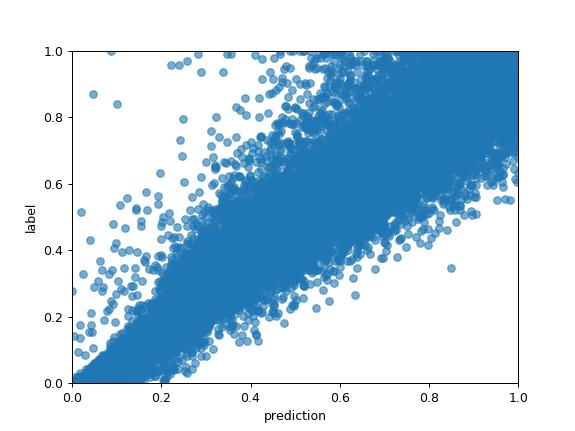

In [5]:
#模型应用
#n = np.random.randint(100000)       #随机确定一条来看看效果
#print(n)
row=len(df_test)
pre=np.zeros(row)
tar=np.zeros(row)
for n in range(1,row):
    x_test = x__data_test[n]
    x_test = x_test.reshape(1,16)
    predict = sess.run(pred,feed_dict={x:x_test})
    pre[n]=predict
    #print("预测值：%f"%predict)
    target_label = y__data_test[n]
    tar[n]=target_label
    #print("标签值：%f"%target_label)
plt.xlabel('prediction')
plt.ylabel('label')
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(pre,tar,alpha=0.6)
plt.show()